In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
athlete_df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')
world_GDP = pd.read_csv('world_gdp.csv', skiprows = 3)
world_POP = pd.read_csv('world_pop.csv')

In [3]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
print(athlete_df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [6]:
athlete_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
athlete_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
missing_percentage = 100*(athlete_df.isna().sum().sort_values(ascending = False)/len(athlete_df))
missing_percentage[missing_percentage != 0]

Medal     85.326207
Weight    23.191180
Height    22.193821
Age        3.494445
dtype: float64

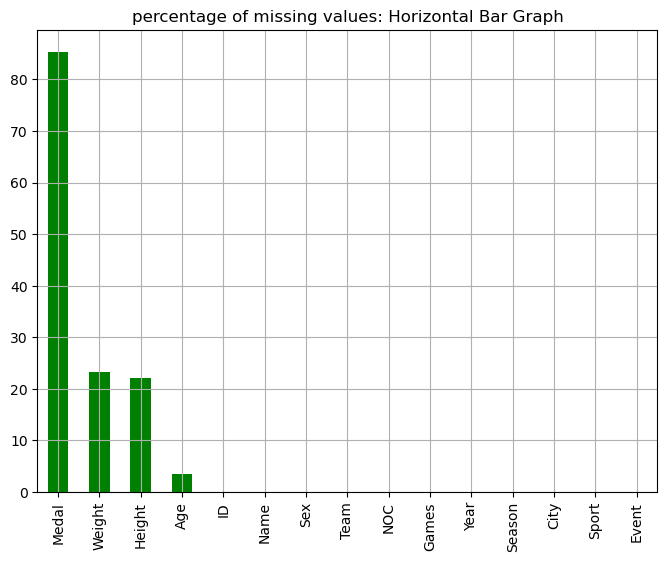

In [9]:
plt.title("percentage of missing values: Horizontal Bar Graph")
missing_percentage.plot(figsize = (8,6), kind = 'bar', grid = True, cmap = 'ocean');

In [10]:
print("Team Names in Dataset:")
print(athlete_df.Team.unique())

Team Names in Dataset:
['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']


In [11]:
print("Sports Types:")
print(athlete_df.Sport.unique())

Sports Types:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [12]:
medal_counts = athlete_df.groupby('NOC')['Medal'].count().sort_values(ascending = False).head(10)
print(medal_counts)

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64


In [13]:
top_athletes = athlete_df.groupby('Name')['Medal'].count().sort_values(ascending = False).head(10)
print(top_athletes)

Name
Michael Fred Phelps, II                 28
Larysa Semenivna Latynina (Diriy-)      18
Nikolay Yefimovich Andrianov            15
Takashi Ono                             13
Borys Anfiyanovych Shakhlin             13
Ole Einar Bjrndalen                     13
Edoardo Mangiarotti                     13
Natalie Anne Coughlin (-Hall)           12
Sawao Kato                              12
Dara Grace Torres (-Hoffman, -Minas)    12
Name: Medal, dtype: int64


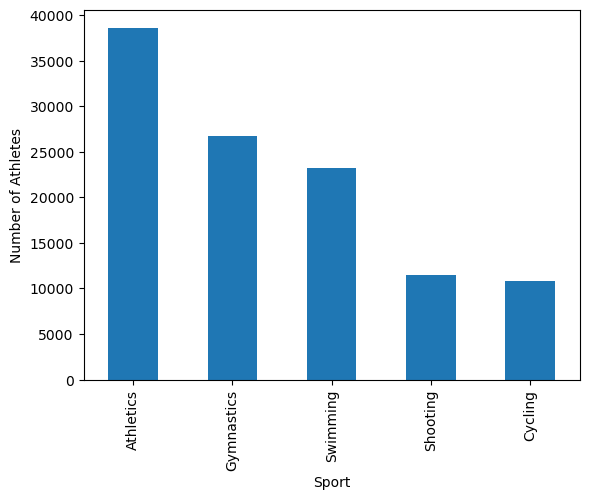

In [14]:
popular_sports = athlete_df['Sport'].value_counts().sort_values(ascending = False).head(5)
popular_sports.plot(kind = 'bar')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.show()

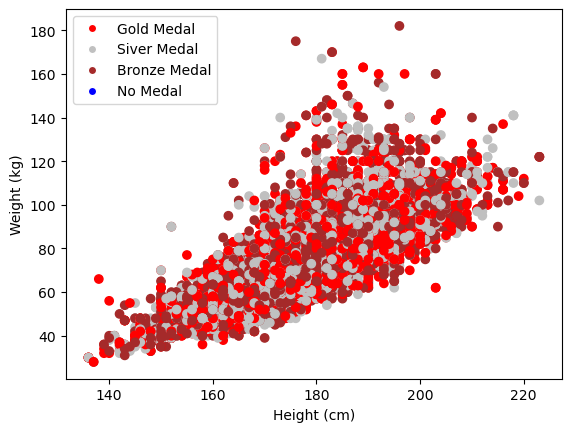

In [15]:
athlete_df1 = athlete_df.dropna(subset = ['Medal'])
colors = {'Gold' : 'red', 'Silver' : 'silver', 'Bronze' : 'brown', np.nan : 'blue'}
labels = {'Gold' : 'Gold Medal', 'Silver' : 'Siver Medal', 'Bronze' : 'Bronze Medal', np.nan : 'No Medal'}

scatter_plot = plt.scatter(athlete_df1['Height'], athlete_df1['Weight'], c = athlete_df1['Medal'].map(colors))
legend_elements = [plt.Line2D([0],[0], marker = 'o', color = 'w', label = labels[key], markerfacecolor = colors[key]) for key in colors]
plt.legend(handles = legend_elements)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

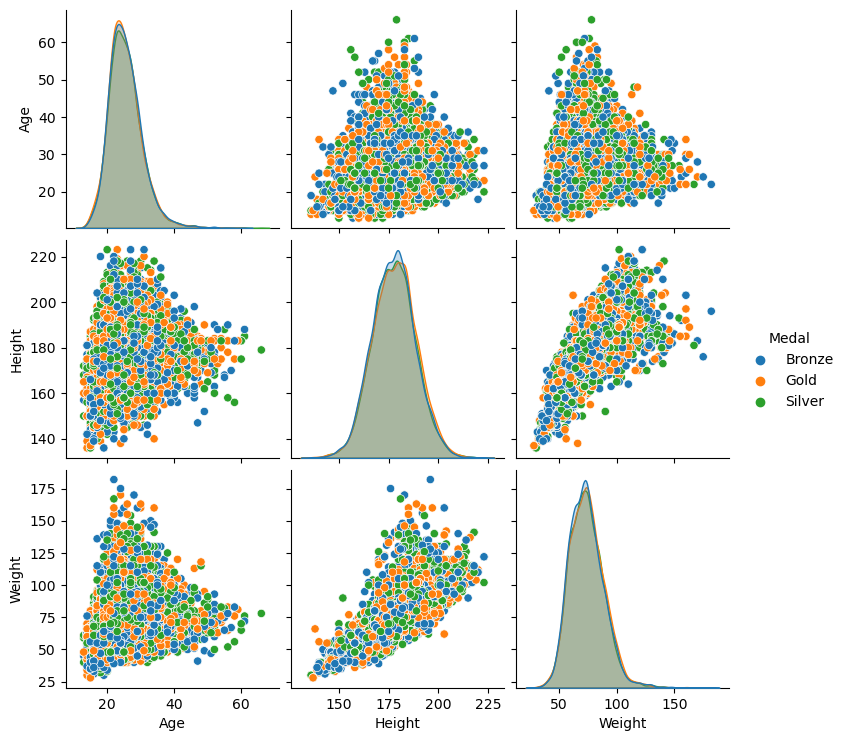

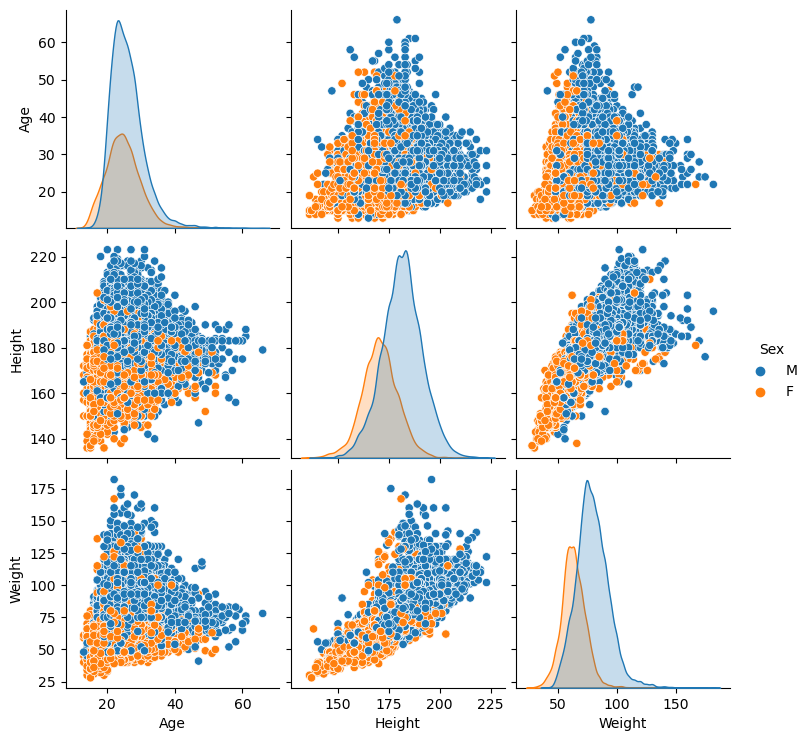

In [16]:
import seaborn as sns
athlete_df_drop = athlete_df[['Sex', 'Age', 'Height', 'Weight', 'Medal']].dropna()
sns.pairplot(athlete_df_drop, hue = 'Medal')
sns.pairplot(athlete_df_drop, hue = 'Sex')

In [17]:
new_athlete_df = athlete_df.dropna()
new_athlete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [18]:
after_2014_athlete_df = new_athlete_df[new_athlete_df['Year']>2014]

In [19]:
after_2014_athlete_df = new_athlete_df.drop(['ID', 'Games', 'NOC', 'City', 'Sport', 'Name'],axis = 1)
after_2014_athlete_df

,Sex,Age,Height,Weight,Team,Year,Season,Event,Medal
40,M,28.0,184.0,85.0,Finland,2014,Winter,Ice Hockey Men's Ice Hockey,Bronze
41,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics Men's Individual All-Around,Bronze
42,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics Men's Team All-Around,Gold
44,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics Men's Horse Vault,Gold
48,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...
271078,F,25.0,168.0,80.0,Soviet Union,1956,Summer,Athletics Women's Shot Put,Silver
271080,F,33.0,168.0,80.0,Soviet Union,1964,Summer,Athletics Women's Shot Put,Bronze
271082,M,28.0,182.0,82.0,Poland,1980,Summer,"Fencing Men's Foil, Team",Bronze
271102,F,19.0,171.0,64.0,Russia,2000,Summer,Athletics Women's 4 x 400 metres Relay,Bronze


In [20]:
print(after_2014_athlete_df.Medal.unique())
print(after_2014_athlete_df.Medal.value_counts())

['Bronze' 'Gold' 'Silver']
Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64


In [21]:
after_2014_athlete_df.Medal.replace(['Bronze', 'Gold', 'Silver'],[3,1,2],inplace = True)

In [22]:
after_2014_athlete_df.Sex.replace(['F','M'],[1,0],inplace = True)

In [23]:
after_2014_athlete_df.Season.replace(['Summer','Winter'],[1,0],inplace = True)

In [24]:
onehot_encoded = pd.get_dummies(after_2014_athlete_df['Event'])
onehot_encoded1 = pd.get_dummies(after_2014_athlete_df['Team'])
new_athlete_df_after_2014 = pd.concat([after_2014_athlete_df, onehot_encoded, onehot_encoded1], axis = 1)
new_athlete_df_after_2014.drop(['Event', 'Team'], axis = 1, inplace = True)

In [25]:
new_athlete_df_after_2014

,Sex,Age,Height,Weight,Year,Season,Medal,Alpine Skiing Men's Combined,Alpine Skiing Men's Downhill,Alpine Skiing Men's Giant Slalom,...,West Germany,West Germany-1,West Germany-2,West Indies Federation,White Lady,Widgeon,Winnipeg Shamrocks-1,Yugoslavia,Zambia,Zimbabwe
40,0,28.0,184.0,85.0,2014,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,28.0,175.0,64.0,1948,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,28.0,175.0,64.0,1948,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,28.0,175.0,64.0,1948,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,28.0,175.0,64.0,1948,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,1,25.0,168.0,80.0,1956,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271080,1,33.0,168.0,80.0,1964,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271082,0,28.0,182.0,82.0,1980,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271102,1,19.0,171.0,64.0,2000,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([1.5450e+03, 1.0006e+04, 1.1746e+04, 5.5300e+03, 9.1200e+02,
        2.7300e+02, 1.2000e+02, 3.3000e+01, 1.3000e+01, 3.0000e+00]),
 array([13. , 18.3, 23.6, 28.9, 34.2, 39.5, 44.8, 50.1, 55.4, 60.7, 66. ]),
 <BarContainer object of 10 artists>)

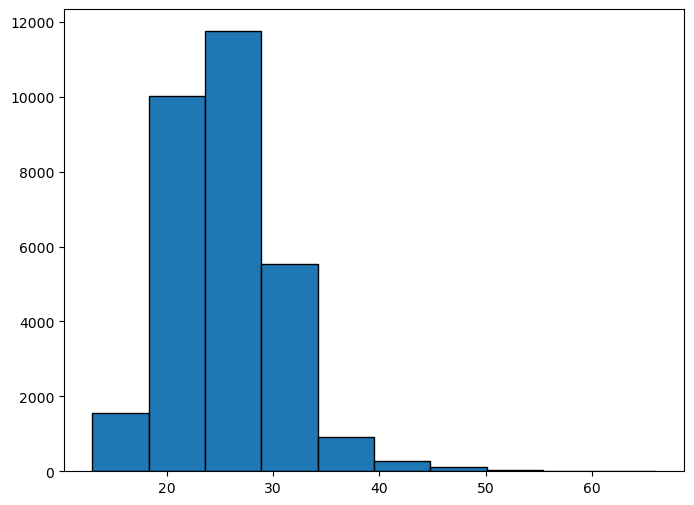

In [26]:
plt.figure(figsize = (8,6))
plt.hist(new_athlete_df_after_2014['Age'],bins = 10, edgecolor = 'black')

(array([  48.,  344., 2027., 5704., 8642., 8811., 3335., 1081.,  158.,
          31.]),
 array([136. , 144.7, 153.4, 162.1, 170.8, 179.5, 188.2, 196.9, 205.6,
        214.3, 223. ]),
 <BarContainer object of 10 artists>)

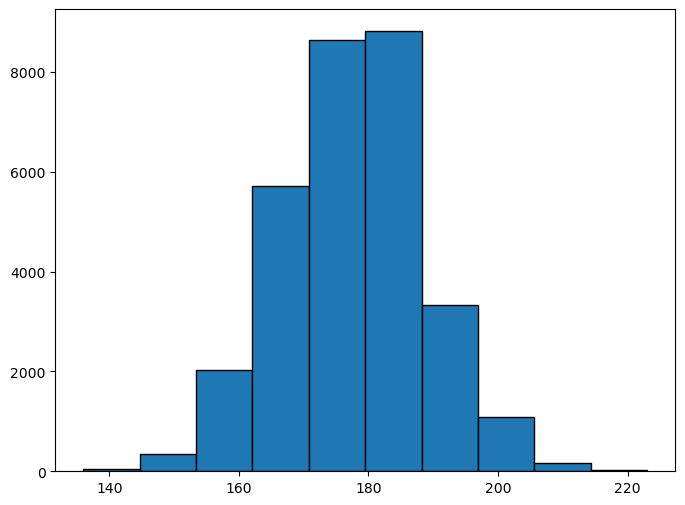

In [27]:
plt.figure(figsize = (8,6))
plt.hist(new_athlete_df_after_2014['Height'], bins = 10, edgecolor = 'black')

(array([2.6600e+02, 4.2290e+03, 1.2051e+04, 9.2890e+03, 3.5110e+03,
        6.2800e+02, 1.4500e+02, 4.5000e+01, 1.2000e+01, 5.0000e+00]),
 array([ 28. ,  43.4,  58.8,  74.2,  89.6, 105. , 120.4, 135.8, 151.2,
        166.6, 182. ]),
 <BarContainer object of 10 artists>)

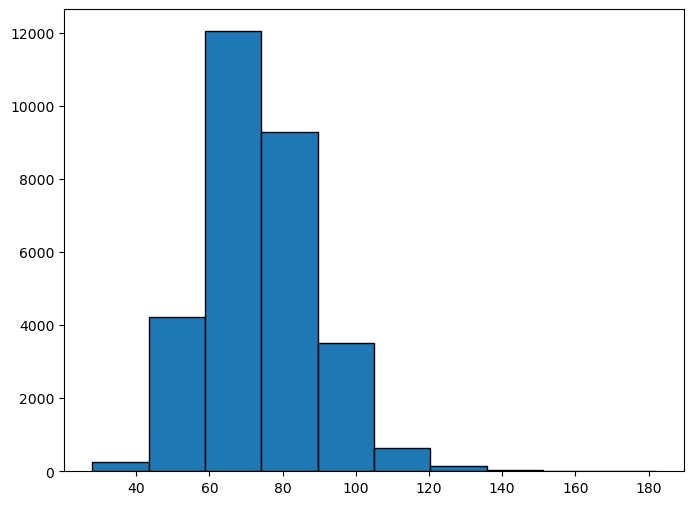

In [28]:
plt.figure(figsize = (8,6))
plt.hist(new_athlete_df_after_2014['Weight'], bins = 10, edgecolor = 'black')

<Axes: xlabel='Age', ylabel='Count'>

<Figure size 1400x800 with 0 Axes>

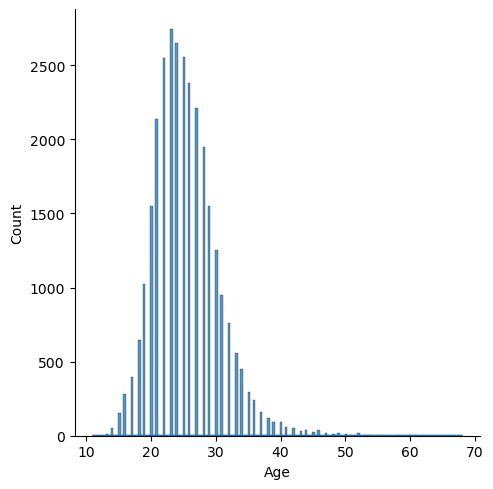

In [29]:
plt.figure(figsize = (14,8))
sns.displot(new_athlete_df_after_2014.Age)
sns.kdeplot(new_athlete_df_after_2014.Age)

<Axes: xlabel='Height', ylabel='Count'>

<Figure size 1400x800 with 0 Axes>

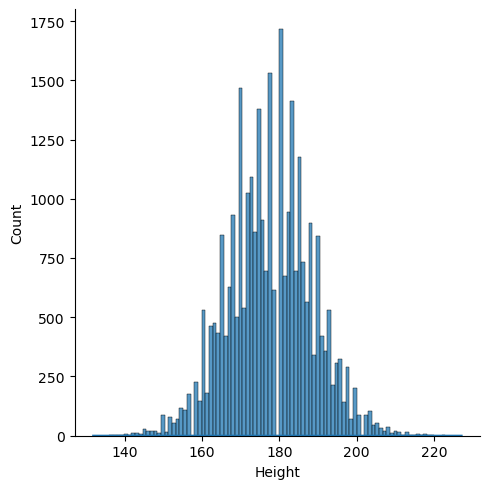

In [30]:
plt.figure(figsize = (14,8))
sns.displot(new_athlete_df_after_2014.Height)
sns.kdeplot(new_athlete_df_after_2014.Height)

<Axes: xlabel='Weight', ylabel='Count'>

<Figure size 1400x800 with 0 Axes>

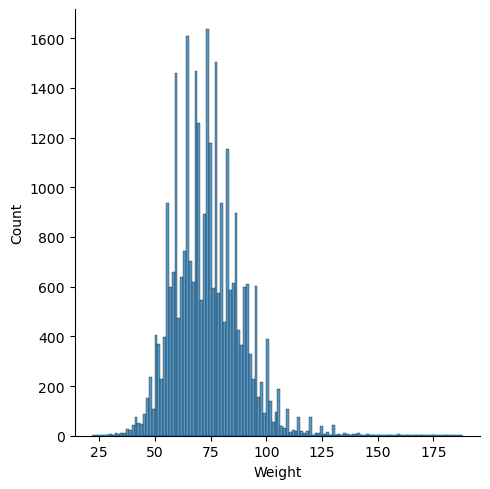

In [31]:
plt.figure(figsize = (14,8))
sns.displot(new_athlete_df_after_2014.Weight)
sns.kdeplot(new_athlete_df_after_2014.Weight)

In [32]:
X = new_athlete_df_after_2014.drop('Medal', axis = 1)
Y = new_athlete_df_after_2014['Medal']

In [33]:
X.shape,Y.shape

((30181, 831), (30181,))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

len(X_train), len(Y_train), len(X_test), len(Y_test)

(24144, 24144, 6037, 6037)

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import sklearn
model = RandomForestClassifier()
model.fit(X_train,Y_train)

from sklearn.metrics import classification_report, accuracy_score
Y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred))

Accuracy: 0.6316051018717906


In [37]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test,model.predict(X_test))
print('confusion matrix: ', CM)

confusion matrix:  [[1413  354  344]
 [ 376 1123  398]
 [ 343  409 1277]]


In [38]:
print('Precision: ', sklearn.metrics.precision_score(Y_test,model.predict(X_test), average = 'macro'))

Precision:  0.6302297969706528


In [39]:
print('Recall: ', sklearn.metrics.recall_score(Y_test,model.predict(X_test), average = 'macro'))

Recall:  0.6302374809396758


In [40]:
print('F1_Score: ', sklearn.metrics.f1_score(Y_test,model.predict(X_test), average = 'macro'))

F1_Score:  0.6302252436963545


In [41]:
pred_df = pd.DataFrame({'Actual_Value': Y_test, 'Predicted_Value':Y_pred})
print(pred_df)

        Actual_Value  Predicted_Value
144006             1                2
107822             2                1
203326             3                3
103866             1                1
232053             3                3
...              ...              ...
270139             2                2
39990              2                2
115960             1                1
1579               3                3
267812             1                3

[6037 rows x 2 columns]


In [42]:
print('Classification Report:',classification_report(Y_test, Y_pred))

Classification Report:               precision    recall  f1-score   support

           1       0.66      0.67      0.67      2111
           2       0.60      0.59      0.59      1897
           3       0.63      0.63      0.63      2029

    accuracy                           0.63      6037
   macro avg       0.63      0.63      0.63      6037
weighted avg       0.63      0.63      0.63      6037



In [43]:
pred_df

,Actual_Value,Predicted_Value
144006,1,2
107822,2,1
203326,3,3
103866,1,1
232053,3,3
...,...,...
270139,2,2
39990,2,2
115960,1,1
1579,3,3


In [44]:
pred_df.Actual_Value.replace([3,1,2],['Bronze','Gold','Silver'],inplace = True)
pred_df.Predicted_Value.replace([3,1,2],['Bronze','Gold','Silver'],inplace = True)
pred_df

,Actual_Value,Predicted_Value
144006,Gold,Silver
107822,Silver,Gold
203326,Bronze,Bronze
103866,Gold,Gold
232053,Bronze,Bronze
...,...,...
270139,Silver,Silver
39990,Silver,Silver
115960,Gold,Gold
1579,Bronze,Bronze
